# Data Cleaning
### Movella Dot

#### data is located in ../data/raw_data/flight/exp1/dot/ shoes/barefoot/ parabola_code
#### coding:
shoes / barefoot = s / b - walk/run/jump w/r/j - paraboloa number
e.g sw5 = shoes walk 5

sw2-5, sr6-9 sj10-12
bw16-19 br20-23 bj24-26


In [1]:
import pandas as pd
import numpy as np
import glob # read in files
import matplotlib.pyplot as plt

g = 9.80665

In [2]:
base = "../data/raw_data/"
env = "flight" #baseline / flight
sensor = "dot"
exp = 2
s_p_code = 4
b_p_code = 18

activity = "w" # w r j for walk run jump

# parabola codes
s_code = f"s{activity}{str(s_p_code)}"
b_code = f"b{activity}{str(b_p_code)}"

print(s_code, b_code)

sw4 bw18


In [3]:
## read in left and right

s_data_path = f"{base}{env}/exp{exp}/{sensor}/shoes/{s_code}/*.csv"
b_data_path = f"{base}{env}/exp{exp}/{sensor}/barefoot/{b_code}/*.csv"

print(s_data_path)
print(b_data_path)
# data paths shoes and barefoot
s_l_data = ""
s_r_data = ""
b_l_data = ""
b_r_data = ""


dfs = [] # holds shoe l/r and barefoot l/r data frames
for file_path in glob.glob(s_data_path):
    file_parts = file_path.split("_")
    print(f"adding {file_path}")
    if "Left" in file_parts:
        s_l_data = file_path
        dfs.append(pd.read_csv(s_l_data))
    else:
        s_r_data = file_path
        dfs.append(pd.read_csv(s_r_data))

for file_path in glob.glob(b_data_path):
    file_parts = file_path.split("_")
    print(f"adding {file_parts}")
    if "Left" in file_parts:
        b_l_data = file_path
        dfs.append(pd.read_csv(b_l_data))
    else:
        b_r_data = file_path
        dfs.append(pd.read_csv(b_r_data))
print(len(dfs))

../data/raw_data/flight/exp2/dot/shoes/sw4/*.csv
../data/raw_data/flight/exp2/dot/barefoot/bw18/*.csv
adding ../data/raw_data/flight/exp2/dot/shoes/sw4\670f8763b938c00a3826902f_670f9527774dd77577bd1b84_1730891202222_D422CD005F71_sw4_Right_Ankle_60.csv
adding ../data/raw_data/flight/exp2/dot/shoes/sw4\670f8763b938c00a3826902f_670f9527774dd77577bd1b84_1730891202222_D422CD005F87_sw4_Left_Ankle_60.csv
adding ['../data/raw', 'data/flight/exp2/dot/barefoot/bw18\\670f8763b938c00a3826902f', '670f9527774dd77577bd1b84', '1730894809890', 'D422CD005F71', 'bw18', 'Right', 'Ankle', '60.csv']
adding ['../data/raw', 'data/flight/exp2/dot/barefoot/bw18\\670f8763b938c00a3826902f', '670f9527774dd77577bd1b84', '1730894809890', 'D422CD005F87', 'bw18', 'Left', 'Ankle', '60.csv']
4


In [4]:
 def vector_magnitude(*args):
    n = len(args[0])
    assert all(len(x) == n for x in args), "Vectors have different lengths"
    vm = np.sqrt(sum(x ** 2 for x in args))
    return vm

accel_lists = []

for df in dfs:
    a_list = [] # pc, x, y, z, mag lists
    a_list.append(df["PacketCounter"])
    a_list.append(df["Acc_X"].to_numpy()/ g)
    a_list.append(df["Acc_Y"].to_numpy()/ g)
    a_list.append(df["Acc_Z"].to_numpy()/ g)
    a_list.append(vector_magnitude(df["Acc_X"].to_numpy()/ g, df["Acc_Y"].to_numpy()/ g, df["Acc_Z"].to_numpy()/ g))

    accel_lists.append(a_list)

In [5]:
for idx, a in enumerate(accel_lists):
    print("packet length", len(a[0]))

packet length 1762
packet length 1759
packet length 1646
packet length 1645


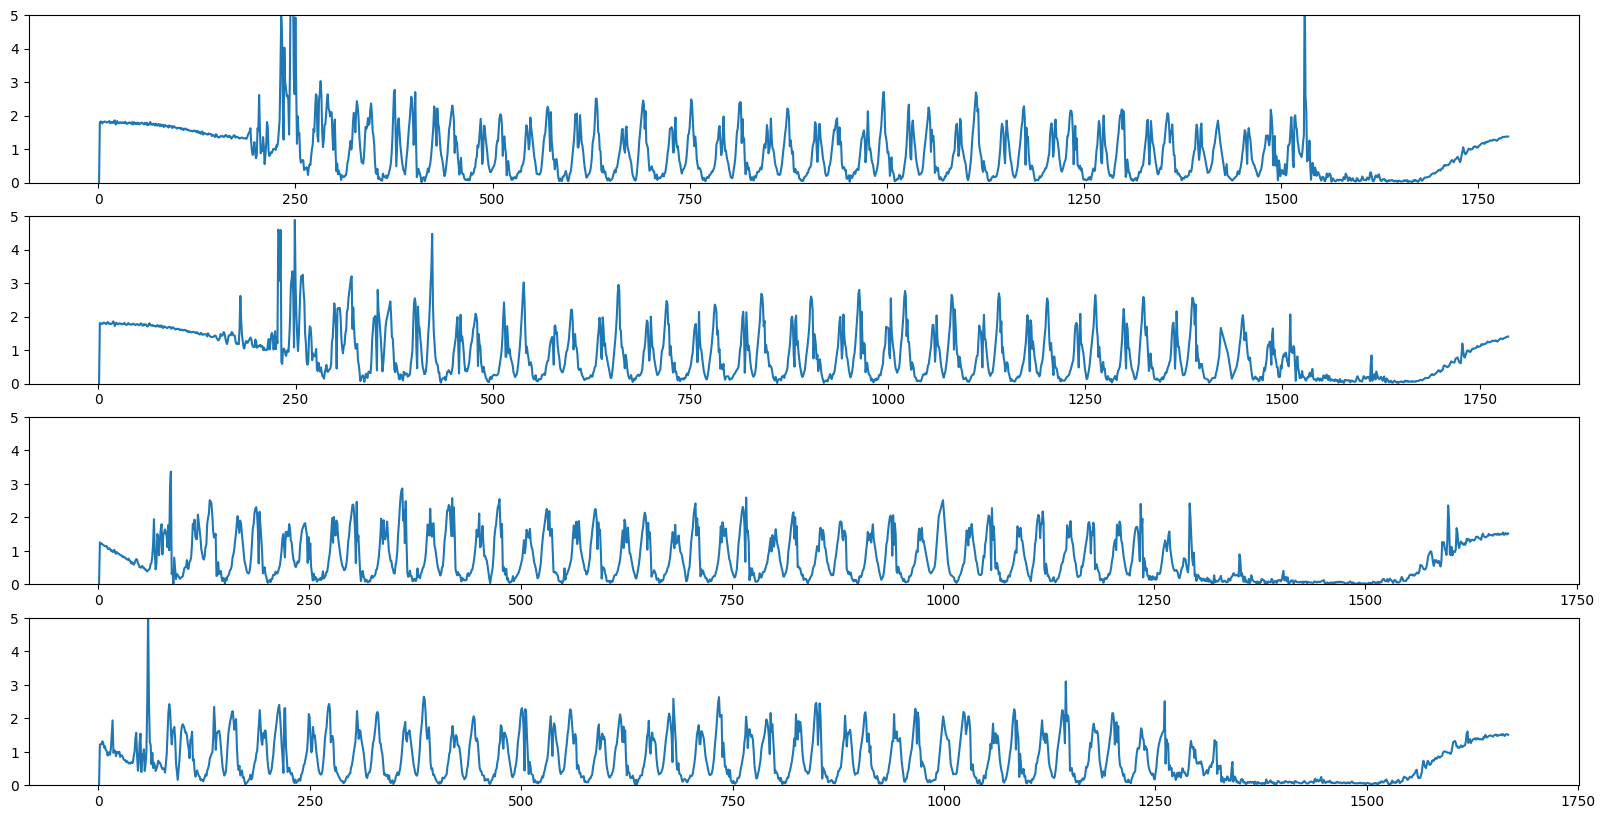

In [6]:
## plot the acceleration

# exp2 br23 starts late use 1200:2100

# simple graphs
fig, ax = plt.subplots(4,1, figsize=(20, 10))

for idx, a in enumerate(accel_lists):
    ax[idx].plot(a[0],a[4])
    ax[idx].set_ylim(0,5)

In [44]:
# remove the first 5 seconds (300 samples)
accel_list_minus_5 = []

for a in accel_lists:
    a_minus_5 = []
    for l in a:
        a_minus_5.append(l[300:])
    accel_list_minus_5.append(a_minus_5)

for idx, a in enumerate(accel_list_minus_5):
    print("packet length", len(a[0]))

packet length 1462
packet length 1459
packet length 1346
packet length 1345


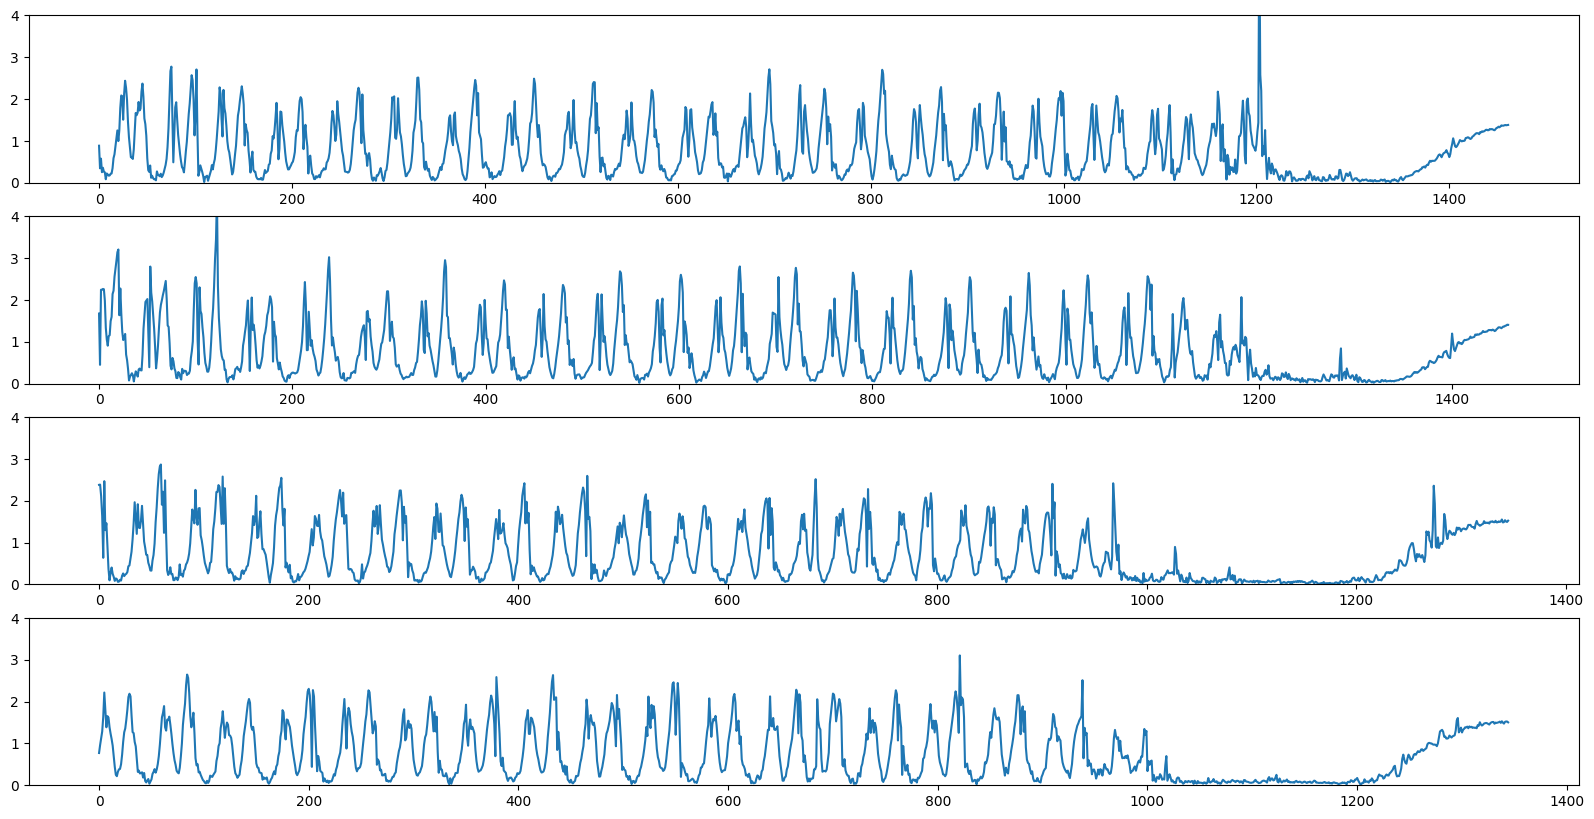

In [45]:
# simple graphs
fig, ax = plt.subplots(4,1, figsize=(20, 10))

for idx, a in enumerate(accel_list_minus_5):
    ax[idx].plot(a[4])
    ax[idx].set_ylim(0,4)